# Finding Unsatable Periodic Orbits With Given Initial Conditions


## Coupled Quartic Hamiltonian:

### Importing packages

In [205]:
# Importing packages
from numpy.lib.polynomial import poly
import numpy as np
from scipy.integrate import solve_ivp
from mpl_toolkits import mplot3d
import uposham.uncoupled_quartic_hamiltonian as uncoupled
import uposham.differential_correction_uncoupled as diff_corr_unc
import uposham.turning_pt_uncoupled as turning_pt_uncoupled 
import uposham.turning_pt_coord_diff_uncoupled as tpcd_uncoupled 

#import uposham.differential_correction as diffcorr
#import os
#path_to_data = os.path.join(os.path.dirname(os.path.dirname(__file__)),'data/')

ModuleNotFoundError: No module named 'uposham.differential_correction'

### Function For Finding Phase Space Orbits

In [145]:
## IVP Solver coupled quartic hamiltonian
"""
Numerical solution of the coupled quartic hamiltonian
"""

# Defining our vector field 
def ham2dof_coupquart(t, x, *parameters):
    
    xDot = np.zeros((4,))

    dVdx = -parameters[2]*x[0] + parameters[3]*x[0]**3 + parameters[5]*(x[0]-x[1])
    dVdy = parameters[4]*x[1] - parameters[5]*(x[0] - x[1])

    xDot[0] = x[2]/parameters[0]
    xDot[1] = x[3]/parameters[1]
    xDot[2] = -dVdx
    xDot[3] = -dVdy

    return xDot

def pe_coupquart(x, y, parameters):

    return -(parameters[2]/2)*x**2 + (parameters[3]/4)*x**4 + (parameters[4]/2)*y**2 + (parameters[5]/2)*((x-y)**2)

def py_momenta(x, y, px, parameters):

    total_energy = parameters[6]
    potential_energy = pe_coupquart(x, y, parameters)
    
    if np.all(total_energy > (potential_energy + (px**2)/(2*parameters[0]))):
        py = np.sqrt(2*parameters[1]*(total_energy - (potential_energy + (px**2)/(2*parameters[0]))))
    
    else:
        py = np.NaN
        
    return py 

def Numerical_Orbit(ham2dof_coupquart, t_span, Y0, method='RK45',rtol = relTol, atol = absTol, args = parameters):
    
    if parameters[-1] < (pe_coupquart(Y0[0], Y0[1], parameters) + (Y0[2]**2)/(2*parameters[0])):
        
        E_min = pe_coupquart(Y0[0], Y0[1], parameters)+((Y0[2]**2)/(2*parameters[0]))
        
        return print('The Energy is not high enough, energy for this system must be at least =', E_min)
    
    else:
        
        return solve_ivp(ham2dof_coupquart, t_span, Y0, method='RK45',rtol = relTol, atol = absTol, args = parameters)

### Setting Constants

In [274]:
    # setting parameters for the system
MASS_A = 1
MASS_B = 1
ALPHA = 1
BETA = 1
OMEGA = 2
EPSILON = 0
TOTAL_ENERGY = 1
parameters = np.array([MASS_A, MASS_B, ALPHA, BETA, OMEGA, EPSILON, TOTAL_ENERGY])

    # Define initial conditions and solve parameters
t_span = [0, 100]
x0 = 0.1
y0 = 0.3
px0 = 0.2
py0 = py_momenta(x0, y0, px0, parameters)
Y0 = [x0, y0, px0,py0]

relTol = 1e-12
absTol = 1e-9

    # Solving for the trajectories


### Finding The Orbits

In [275]:
sol = Numerical_Orbit(ham2dof_coupquart, t_span, Y0, method='RK45',rtol = relTol, atol = absTol, args = parameters)


## Graphing Orbits in the Phase Space

### Simple x,y Orbit Plot

<function matplotlib.pyplot.show(*args, **kw)>

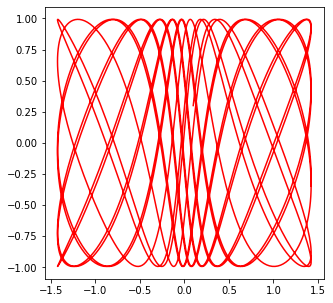

In [276]:
import matplotlib.pyplot as plt                                                                                  
fig = plt.figure(figsize = (5,5))
plt.plot(sol.y[0,:], sol.y[1,:], '-r') 
plt.show

### Now Adding in a Potential Energy Contour

0.0034191462892549673

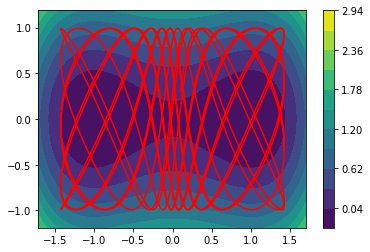

In [285]:
# Setting the bounds for the graph

X_max=np.max(sol.y[0,:])
Y_max=np.max(sol.y[1,:])

# Now we set the spacing and values for the mesh grid of x and y values

x_spacing = (2.4*X_max)/1000
y_spacing = (2.4*Y_max)/1000

x_values=np.arange(-1.2*X_max,1.2*X_max, x_spacing)
y_values=np.arange(-1.2*Y_max,1.2*Y_max, y_spacing)
X, Y = np.meshgrid(x_values, y_values)

# Then we need the values of the potential energy at these points

Z = -(parameters[2]/2)*X**2 + (parameters[3]/4)*X**4 + (parameters[4]/2)*Y**2 + (parameters[5]/2)*((X-Y)**2)

# Then i want to set how different the contours should be 

PE_min=(-1/(4*parameters[3]))*(parameters[2]-(parameters[4]*parameters[5])/(parameters[4]+parameters[5]))**2
Contours = np.arange(PE_min,3*parameters[6],(x_spacing+y_spacing)*50)

# Then we plot our graph

cp = plt.contourf(X, Y, Z, Contours)
plt.colorbar(cp)
plt.plot(sol.y[0,:], sol.y[1,:], '-r') 



### Then a 3D Contour of the Potential Energy

Text(0.5, 0.92, '3D contour')

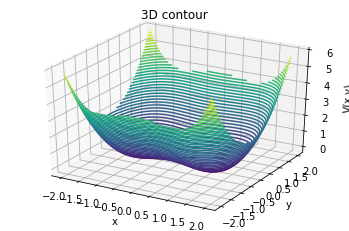

In [286]:
# First setting our x and y values 

DDD_xvals = np.arange(-2,2,0.01)
DDD_yvals = np.arange(-2,2,0.01)
DDDX, DDDY = np.meshgrid(DDD_xvals, DDD_yvals)

# Then setting the values of V(x,y) at these x and y values

DDDZ = -(parameters[2]/2)*DDDX**2 + (parameters[3]/4)*DDDX**4 + (parameters[4]/2)*DDDY**2 + (parameters[5]/2)*((DDDX-DDDY)**2)

# Then plotting our values

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(DDDX, DDDY, DDDZ, 50)

# Then making it look pretty

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('V(x,y)')
ax.set_title('3D contour')


### A Graph Comparing p_y, y, and x 

In [299]:
# First we need the value of p_y at our given points for x and y

py_t_test = 2*parameters[1]*np.sqrt(parameters[6]\
                                    -((px0**2)/(2*parameters[0]))\
                                    +(parameters[2]*X**2)/(2)\
                                    -(parameters[3]*X**4)/(4)\
                                    -(parameters[4]*Y**2)/(2))

# Then we use our analytical solution for y and p_y on the UPO

UPO_y = upo_analytical(sol.t, parameters)[0,:]
UPO_py = upo_analytical(sol.t, parameters)[1,:]

# Then we compare this to the UPOsHam Packages analytical solution

UPO_Parameters = np.append([1],parameters) # UPOsHam function has an extra parameter so i need to extend my parameter list
UPO_Analytic_orbit = uncoupled.upo_analytical(TOTAL_ENERGY, sol.t, UPO_Parameters)

UPOsHam_y = UPO_Analytic_orbit[0,:]
UPOsHam_py = UPO_Analytic_orbit[1,:]


C:\Users\will simpkins\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


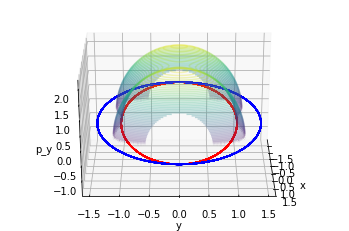

In [300]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(x_values, y_values, py_t_test, 50, alpha = 0.3)
ax.plot3D(np.zeros(len(UPO_y)), UPO_y, UPO_py, '-r')
ax.plot3D(np.zeros(len(UPOsHam_y)), UPOsHam_y, UPOsHam_py, '-b')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('p_y')
ax.view_init(25, 0)


### Solving for the analytical solution to the UPO

In [301]:
def upo_analytical(t, parameters):
    
    E=parameters[6]
    w=parameters[4]
    m_y=parameters[1]
    
    py_t = np.sqrt(2*E*m_y)*np.cos(np.sqrt(w/m_y)*t)
    y_t = np.sqrt(2*E/w)*np.sin(np.sqrt(w/m_y)*t)
    
    return np.array([y_t,py_t])

### Comparing my Analytical solution for the UPO to UPOsHam

In [302]:
Analytic_Orbit = upo_analytical(sol.t, parameters)
Numerical_Orbit = np.array([sol.y[1,:],sol.y[3,:]])


UPO_Parameters = np.append([1],parameters)
UPO_Analytic_orbit = uncoupled.upo_analytical(TOTAL_ENERGY, sol.t, UPO_Parameters)

<function matplotlib.pyplot.show(*args, **kw)>

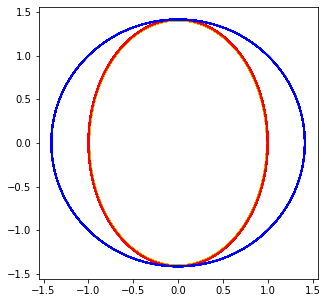

In [306]:
fig = plt.figure(figsize = (5,5))
plt.plot(Numerical_Orbit[0,:], Numerical_Orbit[1,:], '-y')
plt.plot(Analytic_Orbit[0,:], Analytic_Orbit[1,:], '-r')
plt.plot(UPO_Analytic_orbit[0,:], UPO_Analytic_orbit[1,:], '-b')
plt.show

As you can see my analtical solution (in red) does not agree with UPOsHams analytic solution (in blue). when omega and the mass of y are both set to 1 then the two solutions do agree suggesting the problem lies in the values of parameters in the solution

## Checking energy remains constant


In [307]:
def Energy_coupquart(x,y,p_x,p_y, parameters):
    
    T_coupquart = 0.5*((p_x**2)/parameters[0]+(p_y**2)/parameters[1])
    
    Energy = T_coupquart + pe_coupquart(x, y, parameters)
    
    return Energy
    

In [308]:
def Energy_Diff(x, y, p_x, p_y, parameters):
    
    deltaE_val = Energy_coupquart(x,y,p_x,p_y, parameters)-parameters[6]
    
    return deltaE_val

In [309]:
E= Energy_coupquart(sol.y[0,:],sol.y[1,:],sol.y[2,:],sol.y[3,:], parameters)

In [310]:
np.std(E)

2.5628444694331908e-08

So energy seems relatively constant I'm guessing the difference just comes from rounding errors in python 

## Checking Uncoupled Analytic Solutions

In [315]:
from scipy.spatial.distance import directed_hausdorff
import unittest

In [312]:
def hausd_dist_numeric_analytic_test(sol, t, E, parameters):
    
    y, py = upo_analytical( t, parameters)
    
    numerical_orbit = np.array([sol.y[1,:],sol.y[3,:]])
    
    analytic_orbit = np.array([y, py])
    
    hausd_dist = directed_hausdorff(numerical_orbit, analytic_orbit)[0]
    
    return hausd_dist

In [313]:
hausd_dist_numeric_analytic_test(sol, sol.t, TOTAL_ENERGY, parameters)


14.742632038891031

In [296]:
def hausd_dist_numeric_analytic(sol, t, E, parameters):
    
    y, py = uncoupled.upo_analytical(E, t, parameters)
    
    numerical_orbit = np.array([sol.y[1,:],sol.y[3,:]])
    analytical_orbit = np.array([y, py])
    
    hausd_dist = directed_hausdorff(numerical_orbit, analytical_orbit)[0]
    
    return hausd_dist


In [297]:
hausd_dist_numeric_analytic(sol, sol.t, TOTAL_ENERGY, parameters)

47.475515202419345

In [316]:
class TestUnstablePeriodicOrbit(unittest.TestCase):
    
    def test_NumericalMethod(self):
        
        MASS_A = 1
        MASS_B = 1
        TOTAL_ENERGY = 1
        ALPHA = 1
        BETA = 1
        OMEGA = 1
        EPSILON = 0
        
        parameters = np.array([MASS_A, MASS_B, ALPHA, BETA, OMEGA, EPSILON, TOTAL_ENERGY])
        
        TSPAN = [0, 30]
        RelTol = 3.e-12
        AbsTol = 1.e-12
        
        sol = Numerical_Orbit(ham2dof_coupquart, t_span, Y0, method='RK45',rtol = relTol, atol = absTol, args = parameters)

        
        Analytic_Orbit = upo_analytical(sol.t, parameters)
        Numerical_Orbit = np.array([sol.y[1,:],sol.y[3,:]])
        
        np.testing.assert_array_almost_equal(numerical_orbit, analytical_orbit)
        
        hausd_dist = hausd_dist_numeric_analytic(sol, t, E, parameters)
        self.assertLessEqual(hausd_dist, 1e-8)
        
        DeltaEval = Energy_Diff(sol.y[0,:], sol.y[1,:], sol.y[2,:], sol.y[3,:], parameters)
        
        self.assert_array_almost_equal(DeltaEval,np.zeros(len(sol.y[0,:])))

                                                
if __name__ == "__main__":
    unittest.main()


        
        
        
        
        

E
ERROR: C:\Users\will simpkins\AppData\Roaming\jupyter\runtime\kernel-0e07b531-1786-40eb-9f1e-e9a36d1e0e6a (unittest.loader._FailedTest)
----------------------------------------------------------------------
AttributeError: module '__main__' has no attribute 'C:\Users\will simpkins\AppData\Roaming\jupyter\runtime\kernel-0e07b531-1786-40eb-9f1e-e9a36d1e0e6a'

----------------------------------------------------------------------
Ran 1 test in 0.001s

FAILED (errors=1)


SystemExit: True

C:\Users\will simpkins\Documents\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3334: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
